# Market Making with Reinforcement Learning

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Generic
from collections import defaultdict
import random
from tqdm.auto import tqdm

# Data Visualization
import matplotlib.pyplot as plt 

# Reinforcement Learning
import gym
from data.data_gen import DataGenerator

# Custom Modules
from Environment.market_making import MarketMakerEnv

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set the seed for reproducibility
SEED = 42
np.random.seed(SEED)

## Setup the training environment

In [2]:
lob_data = DataGenerator._generator('data/lob.csv', levels=1)
lob_data = lob_data.head(1000).values

In [3]:
# Create the environment
env = MarketMakerEnv(lob_data, 300)
initial_state = env.reset()
display(initial_state)

array([ 2.23990000e+02,  1.00000000e+02,  2.23750000e+02,  7.40000000e+01,
        2.23870000e+02,  2.40000000e-01, -5.00000000e-03, -1.49425287e-01,
       -2.60000000e+01, -2.23338917e-05,  2.40100065e-05,  4.16666667e+01])

In [4]:
# Hyperparameters
alpha = 0.1   # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration-exploitation trade-off
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 1  # Number of episodes

# Initialize the Q-table
q_table = defaultdict(lambda: np.zeros(9))

# Function to choose the next action
def choose_action(state):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore: select a random action
    else:
        return np.argmax(q_table[state])  # Exploit: select the action with max value

In [5]:
# Training loop
for episode in tqdm(range(episodes)):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        state_tuple = tuple(state)  # Convert the state to a tuple for Q-table indexing
        action = choose_action(state_tuple)
        next_state, reward, done, _ = env.step(action)
        next_state_tuple = tuple(next_state)
        
        # Q-learning update rule
        old_value = q_table[state_tuple][action]
        next_max = np.max(q_table[next_state_tuple])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state_tuple][action] = new_value
        
        state = next_state
        total_reward += reward
    
    # Decay epsilon for exploration-exploitation balance
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
    
    # Print episode results
    if episode % 100 == 0:
        print(f"Episode: {episode}, Total Reward: {total_reward}, Epsilon: {epsilon}")

print("Training completed.")

  0%|          | 0/1 [00:00<?, ?it/s]

mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 1
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -4
spread 0.12000000000000455
mid_price 223.87
theta 4
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 1
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -5
spread 0.12000000000000455
mid_price 223.87
theta 5
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -2
spread 0.12000000000000455
mid_price 223.87
theta 5
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -2
spread 0.12000000000000455
mid_price 223.87
theta 5
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -1
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_pri

In [6]:
print('Ask book')
display(env.ask_book)
print('Bid book')
display(env.bid_book)

Ask book


{223.51: 34938,
 223.39: 13144,
 223.26999999999998: 29236,
 223.63: 30459,
 223.75: 33698.0}

Bid book


{223.99: 40580.0,
 224.35000000000002: 17066,
 224.47000000000003: 28928,
 224.23000000000002: 31659,
 224.11: 32707}

## Testing

In [7]:
total_rewards = []
episodes = 100  # Number of episodes for testing

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = np.argmax(q_table[tuple(state)])  # Choose the best action
        state, reward, done, _ = env.step(action)
        total_reward += reward
    
    total_rewards.append(total_reward)

mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_price 223.87
theta -3
spread 0.12000000000000455
mid_price 223.87
theta 3
spread 0.12000000000000455
mid price 223.87
mid_pri

In [8]:
print('Ask book')
display(env.ask_book)
print('Bid book')
display(env.bid_book)

Ask book


{223.51: 14897156,
 223.39: 13144,
 223.26999999999998: 29236,
 223.63: 30459,
 223.75: 0.0}

Bid book


{223.99: 0.0,
 224.35000000000002: 17066,
 224.47000000000003: 28928,
 224.23000000000002: 15151235,
 224.11: 32707}

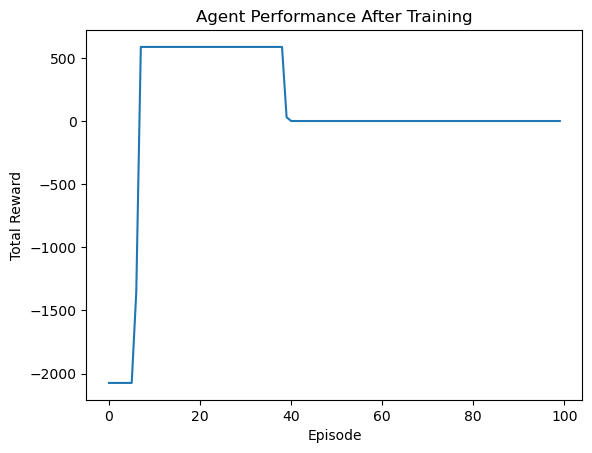

In [9]:
# Plot total rewards
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Agent Performance After Training')
plt.show()